In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, auc, plot_roc_curve, classification_report

In [2]:
csv_url = 'https://github.com/automoto/big-five-data/blob/master/big_five_scores.csv'
df=pd.read_csv('big_five_scores.csv', index_col=0)

# Preprocessing and Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307313 entries, 1 to 334161
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  307141 non-null  object 
 1   age                      307313 non-null  int64  
 2   sex                      307313 non-null  int64  
 3   agreeable_score          307313 non-null  float64
 4   extraversion_score       307313 non-null  float64
 5   openness_score           307313 non-null  float64
 6   conscientiousness_score  307313 non-null  float64
 7   neuroticism_score        307313 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 21.1+ MB


In [4]:
NAN_rows = df.shape[0] - df.dropna().shape[0]
NAN_percent = NAN_rows/df.shape[0]
print(f"The amount of rows containig nan values is {(NAN_percent * 100):.2f}% ")

The amount of rows containig nan values is 0.06% 


In [5]:
#Drop all nan values after review that there are less than 0.1%
data = df.dropna()

In [6]:
data.head()

,country,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
case_id,,,,,,,,
1,South Afri,24,1,0.753333,0.496667,0.803333,0.886667,0.426667
3,UK,24,2,0.733333,0.680000,0.786667,0.746667,0.590000
4,USA,36,2,0.880000,0.770000,0.860000,0.896667,0.296667
5,UK,19,1,0.690000,0.616667,0.716667,0.636667,0.563333
6,UK,17,1,0.600000,0.713333,0.646667,0.633333,0.513333


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307141 entries, 1 to 334161
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  307141 non-null  object 
 1   age                      307141 non-null  int64  
 2   sex                      307141 non-null  int64  
 3   agreeable_score          307141 non-null  float64
 4   extraversion_score       307141 non-null  float64
 5   openness_score           307141 non-null  float64
 6   conscientiousness_score  307141 non-null  float64
 7   neuroticism_score        307141 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 21.1+ MB


In [9]:
data.describe()

,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
count,307141.000000,307141.000000,307141.000000,307141.000000,307141.000000,307141.000000,307141.000000
mean,25.193953,1.602557,0.696809,0.672328,0.733943,0.702013,0.574405
std,10.002145,0.489370,0.093565,0.108672,0.087612,0.107376,0.125743
min,10.000000,1.000000,0.200000,0.200000,0.253333,0.206667,0.196667
25%,18.000000,1.000000,0.640000,0.600000,0.673333,0.630000,0.486667
50%,22.000000,2.000000,0.703333,0.680000,0.736667,0.706667,0.570000
75%,29.000000,2.000000,0.763333,0.750000,0.796667,0.776667,0.660000
max,99.000000,2.000000,1.000000,0.993333,0.996667,1.000000,0.996667


In [27]:
gender_count = data['sex'].value_counts(normalize=True)
print(f"The data containes {(gender_count.iloc[0]*100):.2f}% female's surveys and {(gender_count.iloc[1]*100):.2f}% male's surveys")

The data containes 60.26% female's surveys and 39.74% male's surveys


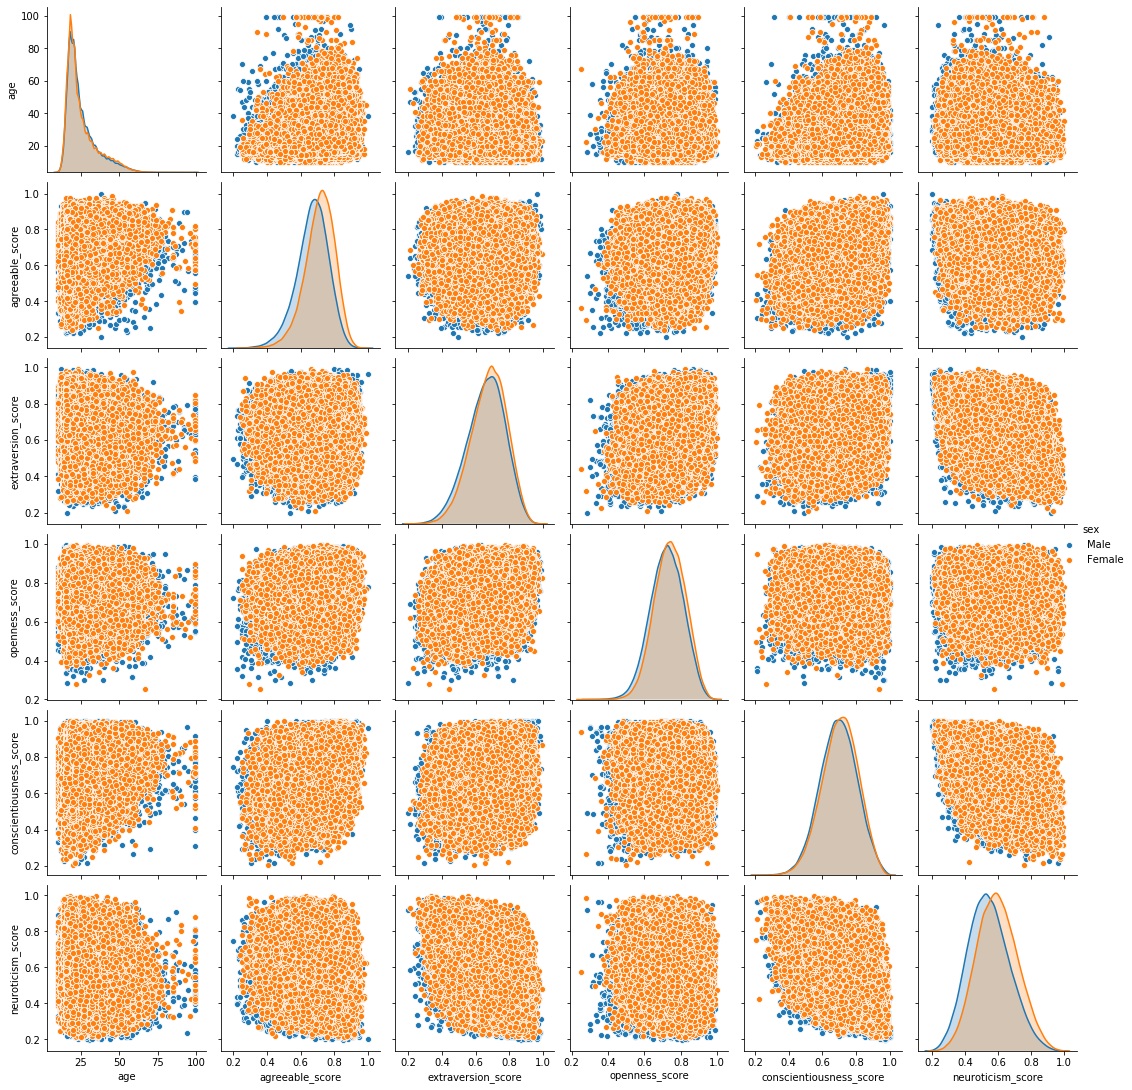

In [11]:
g = sns.pairplot(data, hue='sex')
new_labels = ['Male', 'Female']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
_=g

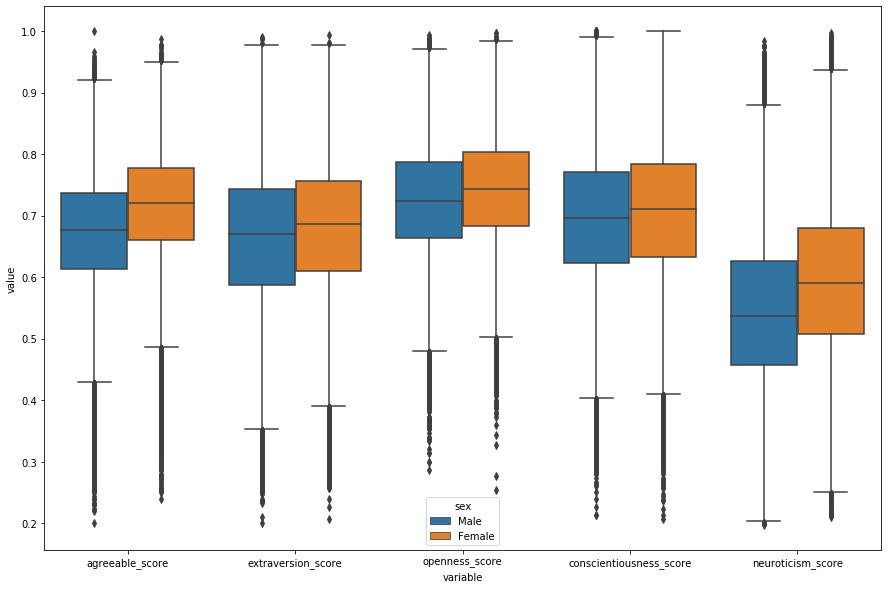

In [12]:
personality_traits = ['agreeable_score', 'extraversion_score', 'openness_score', 'conscientiousness_score','neuroticism_score']
data_personality_melt = pd.melt(data, id_vars=['sex'], value_vars=personality_traits)
data_personality_melt.loc[(data_personality_melt.sex == 1),'sex'] = 'Male'
data_personality_melt.loc[(data_personality_melt.sex == 2),'sex'] = 'Female'
fig, ax = plt.subplots(figsize = (15, 10))
m = sns.boxplot(ax=ax, data=data_personality_melt, x="variable", y="value", hue="sex")

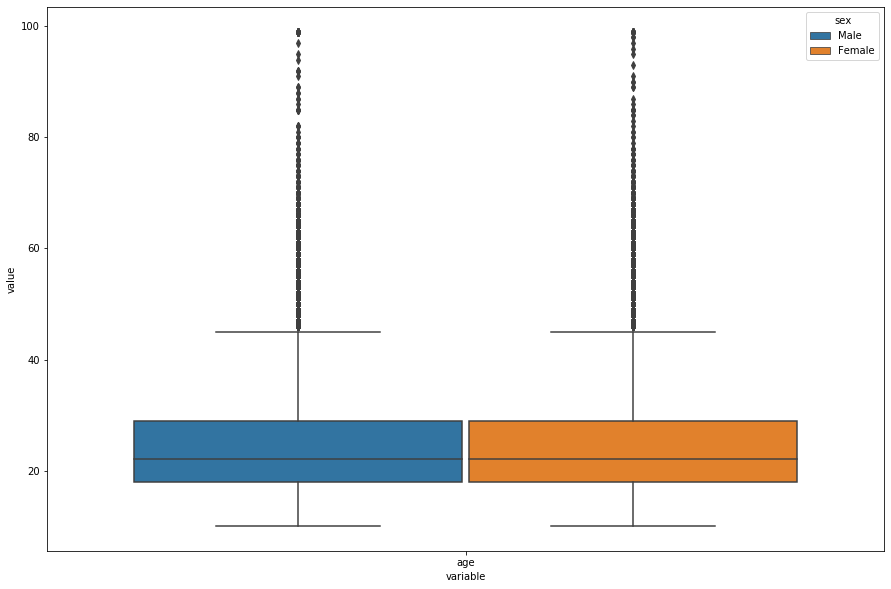

In [13]:
data_age_melt = pd.melt(data, id_vars=['sex'], value_vars=['age'])
data_age_melt.loc[(data_age_melt.sex == 1),'sex'] = 'Male'
data_age_melt.loc[(data_age_melt.sex == 2),'sex'] = 'Female'
fig, ax = plt.subplots(figsize = (15, 10))
m = sns.boxplot(ax=ax, data=data_age_melt, x="variable", y="value", hue="sex")

In [14]:
#How many countries are in the data
len(data.country.unique())

235

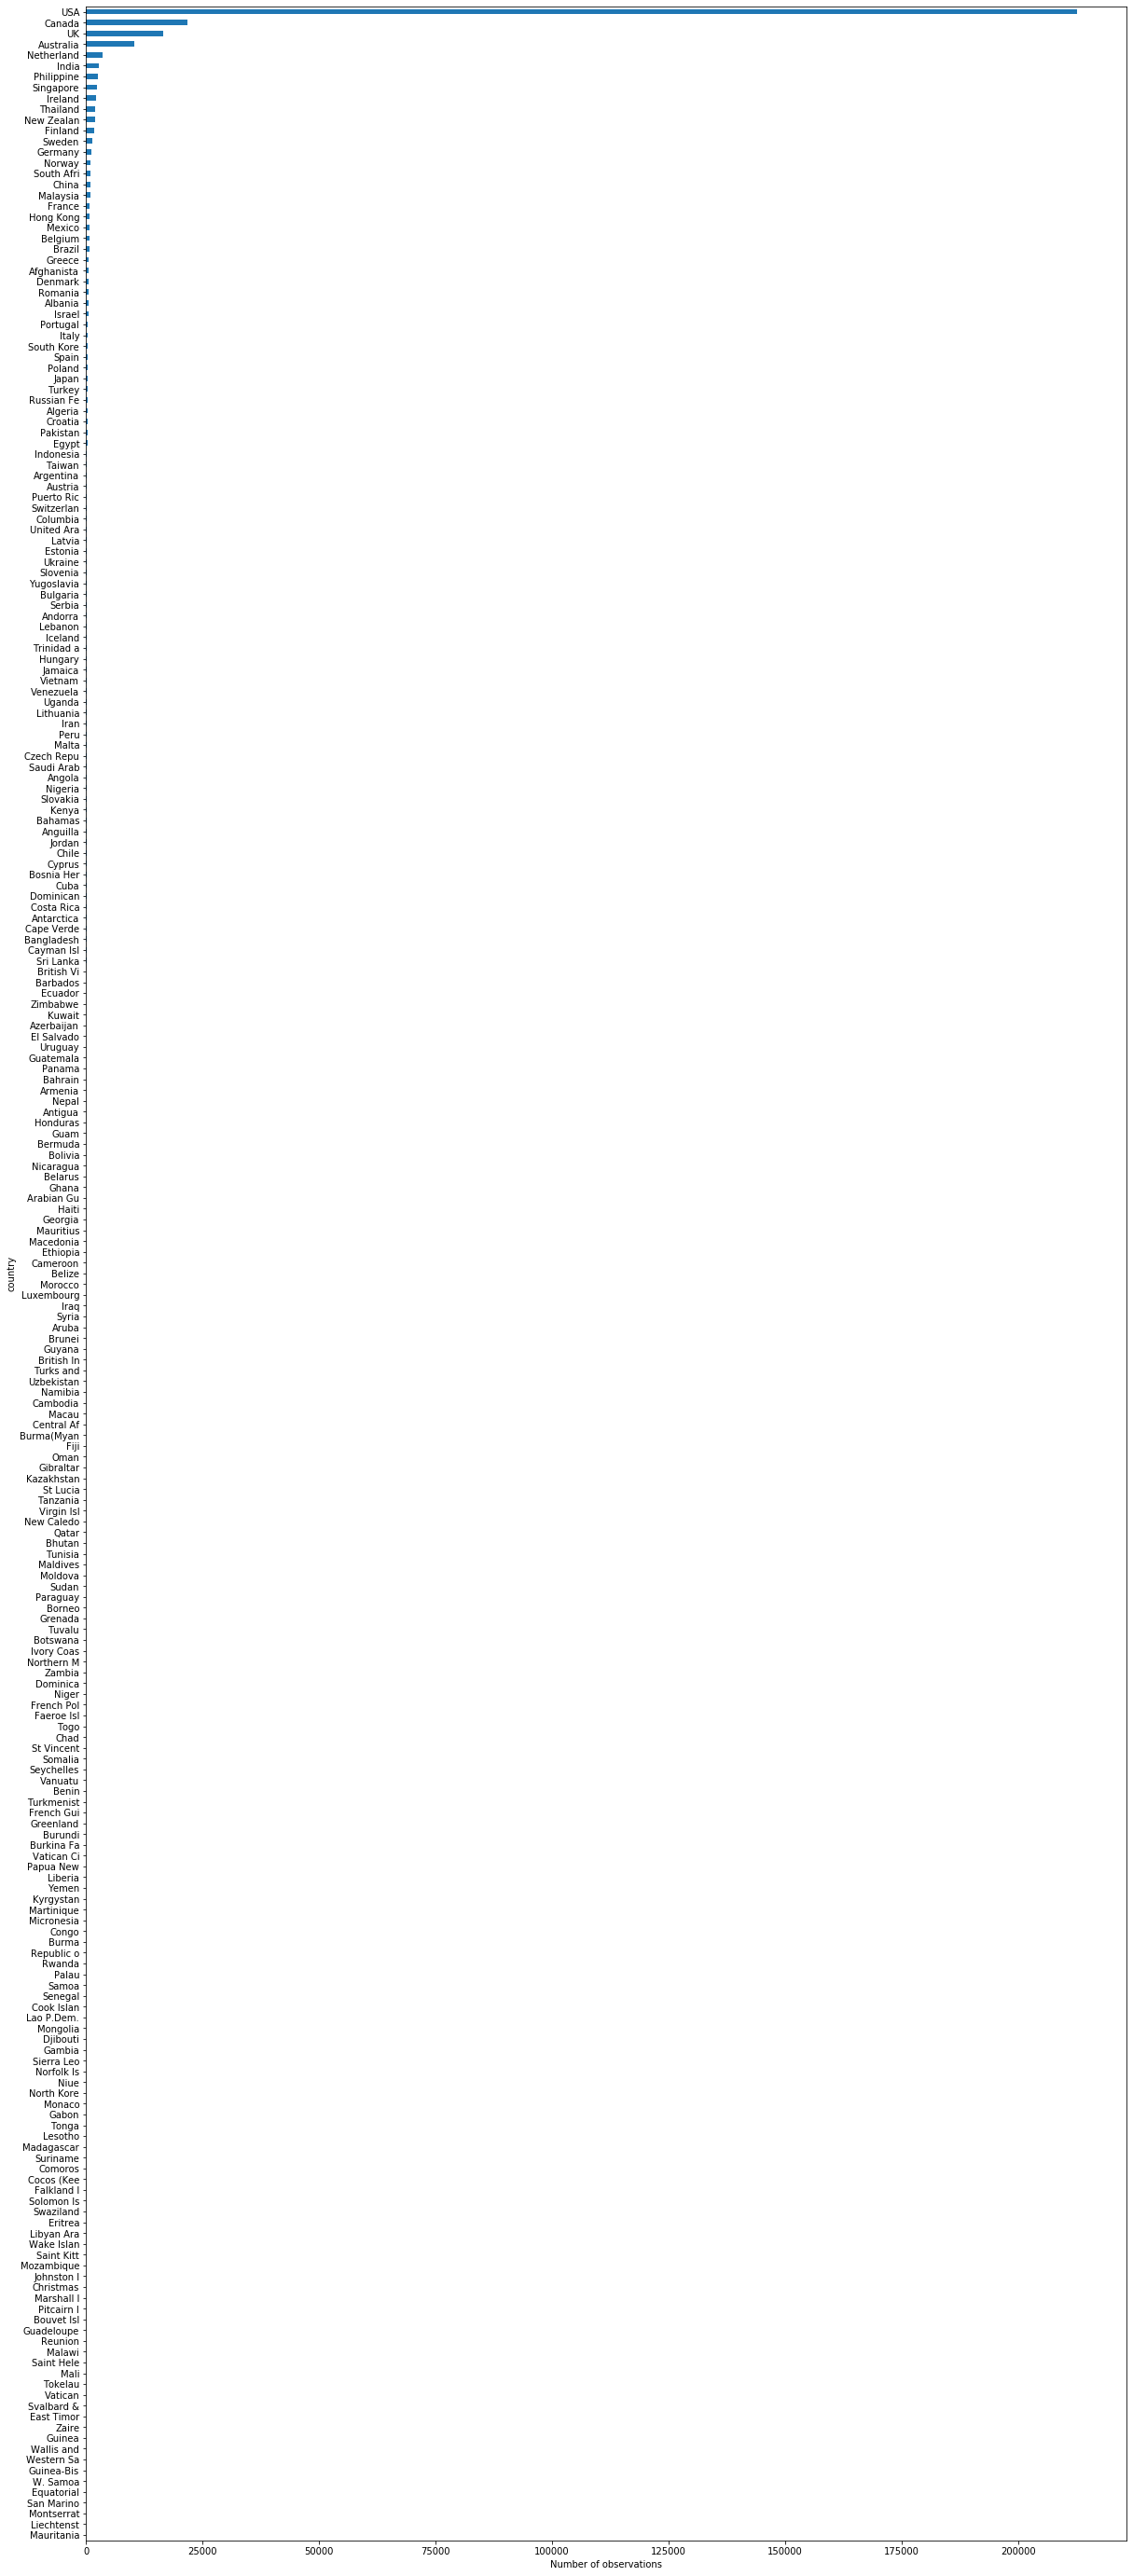

In [15]:
#How many observations there are for each country in the data
country = data.groupby(['country'])['age'].count().sort_values(ascending=True)
_=country.plot(kind='barh', figsize=(20,50))
_=plt.xlabel("Number of observations")

In [16]:
#Narrow countries to only ones with more than significant percent of the data.
data_lenght = len(data)
significant_percent = 0.005
significant_observations = significant_percent * data_lenght
country[country > significant_observations]

country
Finland         1853
New Zealan      2016
Thailand        2059
Ireland         2102
Singapore       2450
Philippine      2488
India           2841
Netherland      3469
Australia      10400
UK             16489
Canada         21798
USA           212625
Name: age, dtype: int64

In [17]:
country_list = country[country > significant_observations].index.values.tolist()

In [18]:
#Build Dataframes of chosen country binary variables and join with data 
countries = pd.get_dummies(data['country'][data['country'].isin(country_list)])
data_country = pd.concat([data, countries] ,axis=1)
data_country.insert(20, 'Other', np.where(np.isnan(data_country['UK'].values), 1, 0)) #add 'other' country column
data_country = data_country.fillna(0).drop(['country'], axis=1)

In [19]:
data_country

,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score,Australia,Canada,Finland,India,Ireland,Netherland,New Zealan,Philippine,Singapore,Thailand,UK,USA,Other
case_id,,,,,,,,,,,,,,,,,,,,
1,24,1,0.753333,0.496667,0.803333,0.886667,0.426667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,24,2,0.733333,0.680000,0.786667,0.746667,0.590000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,36,2,0.880000,0.770000,0.860000,0.896667,0.296667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5,19,1,0.690000,0.616667,0.716667,0.636667,0.563333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
6,17,1,0.600000,0.713333,0.646667,0.633333,0.513333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334156,22,2,0.750000,0.556667,0.733333,0.766667,0.643333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
334157,22,1,0.600000,0.620000,0.566667,0.650000,0.586667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
334158,22,2,0.820000,0.716667,0.753333,0.723333,0.526667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


# PCA

In [20]:
Personality_Traits_list = ['agreeable_score', 'extraversion_score', 'openness_score', 'conscientiousness_score', 'neuroticism_score']

In [65]:

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def pca_plot(data: pd.DataFrame, features: list, color_col: str ="sex"):
    """
    Plots the PCA as desired. 

    Parameters
    ---------
    data: pd.DataFrame
    features: list
        Features's list that we would like to reduce dimension
    ax_i: plt.axes
    color_col: str
        name of column to color the dots by.
    """
    x_only = data_country[features]

    pca_model = make_pipeline(StandardScaler(), PCA(n_components=3))
    pca_model.fit(x_only)

#     #2d
#     X_2D = pca_model.transform(x_only)
#     pca_dict = dict(PCA1=X_2D[:, 0], PCA2=X_2D[:, 1])
#     pca_results = pd.DataFrame(pca_dict)
    
    #3d:
    X_3D = pca_model.transform(x_only)
    pca_dict_3 = dict(PCA1=X_3D[:, 0], PCA2=X_3D[:, 1], PCA3=X_3D[:, 2])
    pca_results = pd.DataFrame(pca_dict_3)


    color_series = data.loc[:, (color_col)].reset_index(drop=True)

    pca_results["color"] = color_series

#     g = sns.scatterplot(data=pca_results, x="PCA1", y="PCA2", hue="color")
    #3d
#     g = sns.scatterplot(data=pca_results, x="PCA1", y="PCA2", z ="PCA3", hue="color")

#     g.legend_.remove()
#     g.set(title=f"PCA of {features} colored by {color_col}")
    
      print(pca_results)


#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection = '3d')

#     x = PCA1
#     y = PCA2
#     z = PCA3

#     ax.set_xlabel("PCA1")
#     ax.set_ylabel("PCA2")
#     ax.set_zlabel("PCA3")

#     ax.scatter(x, y, z)

#     plt.show()

IndentationError: unexpected indent (<ipython-input-65-969f33f7ac1b>, line 44)

In [87]:
pip install plotly

  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=5139332ed21c2d2acb8c6805a7a7f1b07e1f106bcbecac645909b53bb76f052d
  Stored in directory: c:\users\mandy\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


X:           age  agreeable_score  extraversion_score  openness_score  \
case_id                                                             
1         24         0.753333            0.496667        0.803333   
3         24         0.733333            0.680000        0.786667   
4         36         0.880000            0.770000        0.860000   
5         19         0.690000            0.616667        0.716667   
6         17         0.600000            0.713333        0.646667   
...      ...              ...                 ...             ...   
334156    22         0.750000            0.556667        0.733333   
334157    22         0.600000            0.620000        0.566667   
334158    22         0.820000            0.716667        0.753333   
334160    36         0.516667            0.670000        0.783333   
334161    35         0.866667            0.900000        0.956667   

         conscientiousness_score  neuroticism_score  Australia  Canada  \
case_id                 

C:\Users\mandy\anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


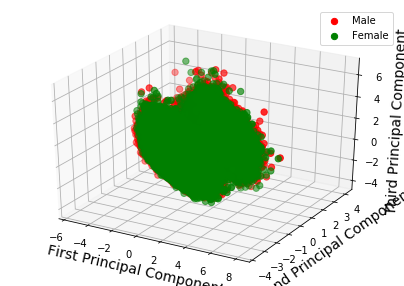

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

no_sex = data_country.columns.drop('sex')

# data = load_breast_cancer()
# print(data)
# X = data_country 
X = data_country[no_sex]
# X = data.data
print('X: ',X)
# y = data.target
# print('y: ',y)
y = data_country['sex'].copy()
print('y: ',y)

sc = StandardScaler()

scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

pca_dict_3 = dict(PCA1=X_pca[:, 0], PCA2=X_pca[:, 1], PCA3=X_pca[:, 2])
pca_results = pd.DataFrame(pca_dict_3)

cdict = {1:'red',2:'green'}
labl = {1:'Male',2:'Female'}
marker = {1:'*',2:'o'}
alpha = {1:.3, 2:.5}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    ix=np.where(y==l)
#  ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
#            label=labl[l], marker=marker[l], alpha=alpha[l])
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
               label=labl[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)



# # fig = px.scatter_3d(df, x='col_x', y='col_y', z='col_z',
# #                     color='cat',
# #                     title="3D Scatter Plot")
# fig = px.scatter_3d(pca_results, x='PCA1', y='PCA2', z='PCA3',
#                     color=pca_dict_3,
#                     title="3D Scatter Plot")

fig.show()

ax.legend()
plt.show()

NameError: name 'PCA1' is not defined

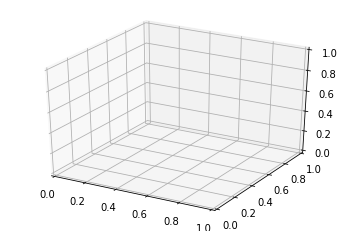

In [66]:
_=pca_plot(data_country, Personality_Traits_list)

In [58]:
למםס
#'agreeable_score','neuroticism_score',
#western cultur: ['Australia', 'Canada', 'New Zealan', 'UK, 'USA']
#eastern cultur:['India', 'Philippine', 'Singapore', 'Thailand']
#european cultur: ['Finland', 'Ireland','Netherland']

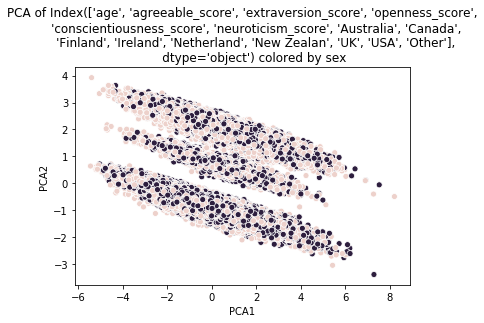

In [52]:
_=pca_plot(data_country, data_country.columns.drop(eastern_cultur))

#data_country.columns

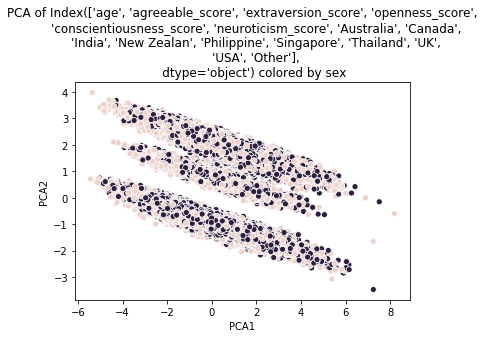

In [53]:
_=pca_plot(data_country, data_country.columns.drop(european_cultur))


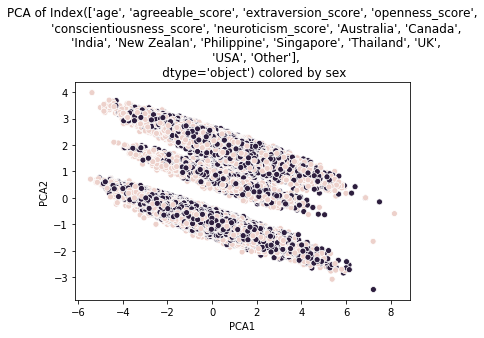

In [54]:
_=pca_plot(data_country, data_country.columns.drop(european_cultur,western_cultur))


In [108]:
#Normalize features
scaler = MinMaxScaler()
names = data_country.columns
d = scaler.fit_transform(data_country)
scaled_data_country = pd.DataFrame(d, index=data_country.index, columns=names)
scaled_data_country

,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score,Australia,Canada,Finland,India,Ireland,Netherland,New Zealan,Philippine,Singapore,Thailand,UK,USA,Other
case_id,,,,,,,,,,,,,,,,,,,,
1,0.157303,0.0,0.691667,0.373950,0.739910,0.857143,0.287500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.157303,1.0,0.666667,0.605042,0.717489,0.680672,0.491667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.292135,1.0,0.850000,0.718487,0.816143,0.869748,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.101124,0.0,0.612500,0.525210,0.623318,0.542017,0.458333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.078652,0.0,0.500000,0.647059,0.529148,0.537815,0.395833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334156,0.134831,1.0,0.687500,0.449580,0.645740,0.705882,0.558333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
334157,0.134831,0.0,0.500000,0.529412,0.421525,0.558824,0.487500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
334158,0.134831,1.0,0.775000,0.651261,0.672646,0.651261,0.412500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# K-Means 

In [122]:
from sklearn.cluster import KMeans

In [134]:
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(scaled_data_country[personality_traits])
y_km = Kmeans.fit_predict(scaled_data_country[personality_traits])
new_series = pd.Series(y_km, index=scaled_data_country.index, name='cluster')
scaled_data_country_Kmeans = pd.concat([scaled_data_country, new_series] ,axis=1)

In [135]:
scaled_data_country_Kmeans

,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score,Australia,Canada,Finland,...,Ireland,Netherland,New Zealan,Philippine,Singapore,Thailand,UK,USA,Other,cluster
case_id,,,,,,,,,,,,,,,,,,,,,
1,0.157303,0.0,0.691667,0.373950,0.739910,0.857143,0.287500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,0.157303,1.0,0.666667,0.605042,0.717489,0.680672,0.491667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,0.292135,1.0,0.850000,0.718487,0.816143,0.869748,0.125000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
5,0.101124,0.0,0.612500,0.525210,0.623318,0.542017,0.458333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
6,0.078652,0.0,0.500000,0.647059,0.529148,0.537815,0.395833,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334156,0.134831,1.0,0.687500,0.449580,0.645740,0.705882,0.558333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
334157,0.134831,0.0,0.500000,0.529412,0.421525,0.558824,0.487500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
334158,0.134831,1.0,0.775000,0.651261,0.672646,0.651261,0.412500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [136]:
scaled_data_country_Kmeans.groupby(by=["cluster", "sex"]).median()

age  agreeable_score  extraversion_score  openness_score  \
cluster sex                                                                  
0       0.0  0.134831         0.575000            0.441176        0.591928   
        1.0  0.134831         0.629167            0.474790        0.609865   
1       0.0  0.112360         0.550000            0.647059        0.672646   
        1.0  0.112360         0.604167            0.676471        0.699552   
2       0.0  0.157303         0.641667            0.638655        0.636771   
        1.0  0.157303         0.700000            0.651261        0.659193   

             conscientiousness_score  neuroticism_score  Australia  Canada  \
cluster sex                                                                  
0       0.0                 0.554622           0.575000        0.0     0.0   
        1.0                 0.588235           0.633333        0.0     0.0   
1       0.0                 0.537815           0.458333        0.0     0.0   
        1.0                 0.554622           0.516667        0.0     0.0   
2       0.0                 0.718487           0.312500        0.0     0.0   
        1.0                 0.735294           0.370833        0.0     0.0   

             Finland  India  Ireland  Netherland  New Zealan  Philippine  \
cluster sex                                                                
0       0.0      0.0    0.0      0.0         0.0         0.0         0.0   
        1.0      0.0    0.0      0.0         0.0         0.0         0.0   
1       0.0      0.0    0.0      0.0         0.0         0.0         0.0   
        1.0      0.0    0.0      0.0         0.0         0.0         0.0   
2       0.0      0.0    0.0      0.0         0.0         0.0         0.0   
        1.0      0.0    0.0      0.0         0.0         0.0         0.0   

             Singapore  Thailand   UK  USA  Other  
cluster sex                                        
0       0.0        0.0       0.0  0.0  1.0    0.0  
        1.0        0.0       0.0  0.0  1.0    0.0  
1       0.0        0.0       0.0  0.0  1.0    0.0  
        1.0        0.0       0.0  0.0  1.0    0.0  
2       0.0        0.0       0.0  0.0  1.0    0.0  
        1.0        0.0       0.0  0.0  1.0    0.0

In [137]:
scaled_data_country_Kmeans.groupby(by=["cluster", "sex"]).count()

age  agreeable_score  extraversion_score  openness_score  \
cluster sex                                                               
0       0.0  35704            35704               35704           35704   
        1.0  56440            56440               56440           56440   
1       0.0  36213            36213               36213           36213   
        1.0  58076            58076               58076           58076   
2       0.0  50154            50154               50154           50154   
        1.0  70554            70554               70554           70554   

             conscientiousness_score  neuroticism_score  Australia  Canada  \
cluster sex                                                                  
0       0.0                    35704              35704      35704   35704   
        1.0                    56440              56440      56440   56440   
1       0.0                    36213              36213      36213   36213   
        1.0                    58076              58076      58076   58076   
2       0.0                    50154              50154      50154   50154   
        1.0                    70554              70554      70554   70554   

             Finland  India  Ireland  Netherland  New Zealan  Philippine  \
cluster sex                                                                
0       0.0    35704  35704    35704       35704       35704       35704   
        1.0    56440  56440    56440       56440       56440       56440   
1       0.0    36213  36213    36213       36213       36213       36213   
        1.0    58076  58076    58076       58076       58076       58076   
2       0.0    50154  50154    50154       50154       50154       50154   
        1.0    70554  70554    70554       70554       70554       70554   

             Singapore  Thailand     UK    USA  Other  
cluster sex                                            
0       0.0      35704     35704  35704  35704  35704  
        1.0      56440     56440  56440  56440  56440  
1       0.0      36213     36213  36213  36213  36213  
        1.0      58076     58076  58076  58076  58076  
2       0.0      50154     50154  50154  50154  50154  
        1.0      70554     70554  70554  70554  70554

In [138]:
scaled_data_country_Kmeans.groupby(by=["cluster", "sex"]).mean()

age  agreeable_score  extraversion_score  openness_score  \
cluster sex                                                                  
0       0.0  0.170223         0.568589            0.432341        0.592092   
        1.0  0.173129         0.622516            0.467378        0.611134   
1       0.0  0.138314         0.542014            0.652788        0.669978   
        1.0  0.134027         0.598363            0.679663        0.697087   
2       0.0  0.195193         0.635829            0.637828        0.633345   
        1.0  0.198478         0.694990            0.651225        0.658249   

             conscientiousness_score  neuroticism_score  Australia    Canada  \
cluster sex                                                                    
0       0.0                 0.553538           0.582774   0.033302  0.075146   
        1.0                 0.580600           0.636969   0.034036  0.073370   
1       0.0                 0.531523           0.460934   0.034049  0.077983   
        1.0                 0.545452           0.519125   0.037675  0.077347   
2       0.0                 0.723670           0.309048   0.034534  0.061690   
        1.0                 0.737329           0.367453   0.030289  0.064688   

              Finland     India   Ireland  Netherland  New Zealan  Philippine  \
cluster sex                                                                     
0       0.0  0.009943  0.013640  0.007730    0.008346    0.007142    0.007170   
        1.0  0.005634  0.005138  0.005882    0.008239    0.005865    0.009426   
1       0.0  0.007401  0.010217  0.008478    0.012620    0.007180    0.007649   
        1.0  0.006044  0.004270  0.007525    0.010831    0.007129    0.009195   
2       0.0  0.006021  0.020975  0.008514    0.013538    0.006719    0.007357   
        1.0  0.003671  0.005584  0.004578    0.013337    0.005939    0.007370   

             Singapore  Thailand        UK       USA     Other  
cluster sex                                                     
0       0.0   0.010027  0.007478  0.071589  0.640685  0.107803  
        1.0   0.011800  0.006219  0.053366  0.709568  0.071456  
1       0.0   0.007511  0.008146  0.073648  0.650650  0.094469  
        1.0   0.007955  0.008041  0.060472  0.688202  0.075315  
2       0.0   0.006839  0.004626  0.046198  0.668940  0.114049  
        1.0   0.004947  0.006336  0.034371  0.745840  0.073050

In [139]:
scaled_data_country_Kmeans.groupby(by=["cluster", "sex"]).sum()

age  agreeable_score  extraversion_score  \
cluster sex                                                      
0       0.0   6077.629213     20300.908333        15436.315126   
        1.0   9771.415730     35134.791667        26378.819328   
1       0.0   5008.752809     19627.962500        23639.399160   
        1.0   7783.730337     34750.516667        39472.121849   
2       0.0   9789.707865     31889.391667        31989.626050   
        1.0  14003.438202     49034.345833        45946.516807   

             openness_score  conscientiousness_score  neuroticism_score  \
cluster sex                                                               
0       0.0    21140.040359             19763.533613       20807.354167   
        1.0    34492.408072             32769.054622       35950.541667   
1       0.0    24261.910314             19248.037815       16691.820833   
        1.0    40484.017937             31677.663866       30148.679167   
2       0.0    31764.807175             36294.962185       15499.995833   
        1.0    46442.089686             52021.478992       25925.245833   

             Australia  Canada  Finland   India  Ireland  Netherland  \
cluster sex                                                            
0       0.0     1189.0  2683.0    355.0   487.0    276.0       298.0   
        1.0     1921.0  4141.0    318.0   290.0    332.0       465.0   
1       0.0     1233.0  2824.0    268.0   370.0    307.0       457.0   
        1.0     2188.0  4492.0    351.0   248.0    437.0       629.0   
2       0.0     1732.0  3094.0    302.0  1052.0    427.0       679.0   
        1.0     2137.0  4564.0    259.0   394.0    323.0       941.0   

             New Zealan  Philippine  Singapore  Thailand      UK      USA  \
cluster sex                                                                 
0       0.0       255.0       256.0      358.0     267.0  2556.0  22875.0   
        1.0       331.0       532.0      666.0     351.0  3012.0  40048.0   
1       0.0       260.0       277.0      272.0     295.0  2667.0  23562.0   
        1.0       414.0       534.0      462.0     467.0  3512.0  39968.0   
2       0.0       337.0       369.0      343.0     232.0  2317.0  33550.0   
        1.0       419.0       520.0      349.0     447.0  2425.0  52622.0   

              Other  
cluster sex          
0       0.0  3849.0  
        1.0  4033.0  
1       0.0  3421.0  
        1.0  4374.0  
2       0.0  5720.0  
        1.0  5154.0

# Logistic Regression model

In [95]:
def split_df (target_name: str, data: pd.DataFrame):
    """ 
    Split df into random train and test subsets based on target name column

    Parameters
    ----------
    target_name : str
        target column name
    data : DataFrame
        DataFrame  

    return
    ----------
    X_train, X_test, y_train, y_test
    """
    X = data.drop(columns=[target_name])
    y = data[target_name].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [90]:
#prediction of sex without the country feature by LogisticRegression model
data_no_country = data.drop('country', axis=1)
target_name = 'sex'
X_train, X_test, y_train, y_test = split_df(target_name, data_no_country)
Lreg = LogisticRegression().fit(X_train, y_train) 
y_predicted = Lreg.predict(X_test)

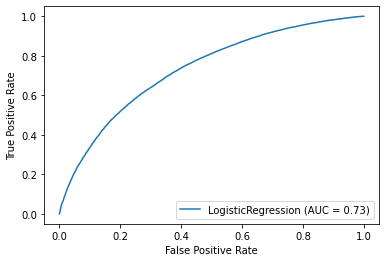

In [91]:
_ = plot_roc_curve(Lreg, X_test, y_test)

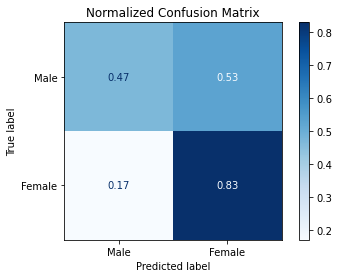

In [92]:
disp = plot_confusion_matrix(Lreg,
                             X_test,
                             y_test,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix")

If the personality survey is of famle, the model can predict it is a female's survey by 83%
But if the personality survey is of male, the model can't predict if it's a male or a famle.

In [93]:
target_names = ['Male', 'Female']
report = classification_report(y_test, y_predicted, target_names=target_names)
print(report)

              precision    recall  f1-score   support

        Male       0.65      0.47      0.54     24371
      Female       0.70      0.83      0.76     37058

    accuracy                           0.69     61429
   macro avg       0.68      0.65      0.65     61429
weighted avg       0.68      0.69      0.68     61429



In [140]:
#prediction of sex with the country categorial features by LogisticRegression model
target_name = 'sex'
X_train1, X_test1, y_train1, y_test1 = split_df(target_name, scaled_data_country_Kmeans)
Lreg_country = LogisticRegression(max_iter=10000).fit(X_train1, y_train1) 
y_predicted1 = Lreg_country.predict(X_test1)
y_predicted2 = Lreg_country.predict_proba(X_test1)

In [141]:
y_scores = y_predicted2[:,1]
fpr, tpr, thresholds = roc_curve(y_test1, y_scores, pos_label=2)
auc(fpr, tpr)

C:\Users\efrat\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


nan

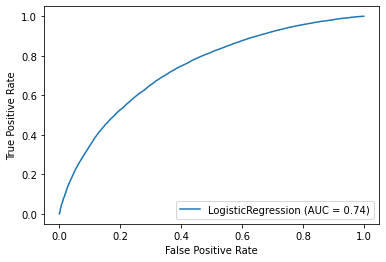

In [142]:
_ = plot_roc_curve(Lreg_country, X_test1, y_test1)

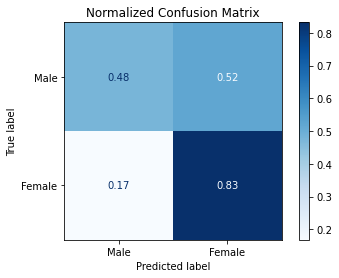

In [143]:
disp1 = plot_confusion_matrix(Lreg_country,
                             X_test1,
                             y_test1,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp1.ax_.set_title("Normalized Confusion Matrix")

# Decision Tree model

In [102]:
#prediction of sex without the country feature by DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()
_ = decision_tree.fit(X_train, y_train)

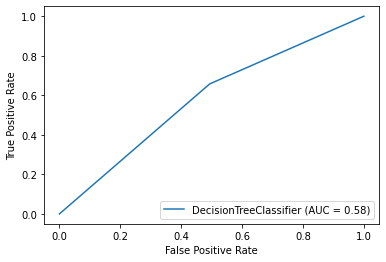

In [103]:
_ = plot_roc_curve(decision_tree, X_test, y_test)

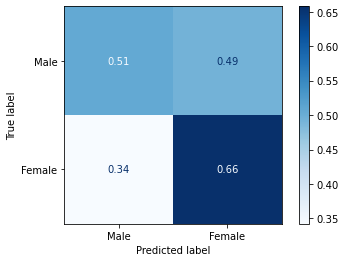

In [104]:
_ = plot_confusion_matrix(decision_tree,
                          X_test,
                          y_test,
                          display_labels=['Male', 'Female'],
                          cmap=plt.cm.Blues,
                          normalize="true")

# Gradient Boosting model


In [105]:
#prediction of sex without the country feature by GradientBoostingClassifier model
gradient_boosting = GradientBoostingClassifier(random_state=0)
_ = gradient_boosting.fit(X_train, y_train)
y_predicted_gb = gradient_boosting.predict(X_test)

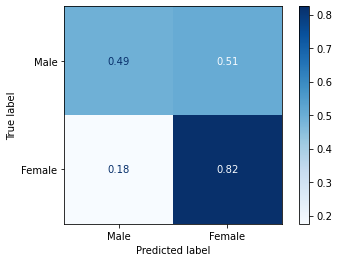

In [106]:
_ = plot_confusion_matrix(gradient_boosting,
                          X_test,
                          y_test,
                          display_labels=['Male', 'Female'],
                          cmap=plt.cm.Blues,
                          normalize="true")

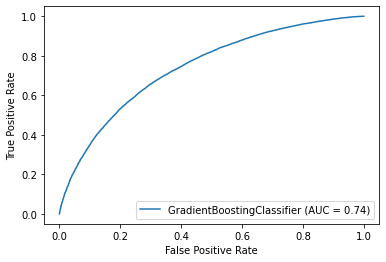

In [107]:
_ = plot_roc_curve(gradient_boosting, X_test, y_test)

In [111]:
#prediction of sex with the country categorial features by GradientBoostingClassifier model
gradient_boosting1 = GradientBoostingClassifier(n_estimators=200, random_state=0)
_ = gradient_boosting1.fit(X_train1, y_train1)
y_predicted_gb1 = gradient_boosting1.predict(X_test1)

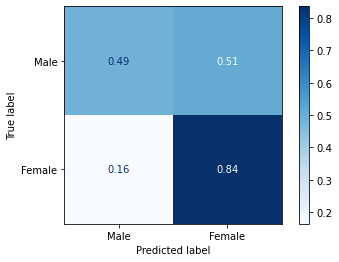

In [112]:
_ = plot_confusion_matrix(gradient_boosting1,
                          X_test1,
                          y_test1,
                          display_labels=['Male', 'Female'],
                          cmap=plt.cm.Blues,
                          normalize="true")

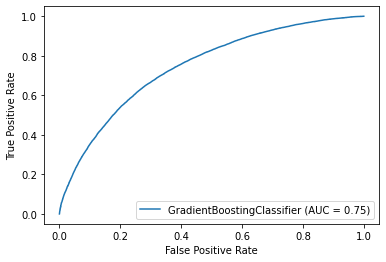

In [113]:
_ = plot_roc_curve(gradient_boosting1, X_test1, y_test1)